<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [39]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE, mode='r', encoding='utf-8') as file:
    fonte = BeautifulSoup(file, features="xml")




In [40]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [46]:
# manipule os dados

conteudo_extraido = list()

for item in fonte.find_all('ESTADO'):
    estado = item.find('NOME').get_text() if item.find('NOME') else None
    sigla = item.find('SIGLA').get_text() if item.find('SIGLA') else None
    regiao = item.find('REGIAO').get_text() if item.find('REGIAO') else None

    conteudo_extraido.append([estado, sigla, regiao])

# Atualizar a entrada de 'SAO PAULO' para 'SÃO PAULO'
for dados in conteudo_extraido:
    if dados[0] == 'SAO PAULO':
        dados[0] = 'SÃO PAULO'

# Verificar a alteração
for dados in conteudo_extraido:
    print(dados)



['ACRE', 'AC', 'NORTE']
['ALAGOAS', 'AL', 'NORDESTE']
['AMAPA', 'AP', 'NORTE']
['AMAZONAS', 'AM', 'NORTE']
['BAHIA', 'BA', 'NORDESTE']
['CEARA', 'CE', 'NORDESTE']
['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE']
['ESPIRITO SANTO', 'ES', 'SUDESTE']
['GOIAS', 'GO', 'CENTRO-OESTE']
['MARANHAO', 'MA', 'NORDESTE']
['MATO GROSSO', 'MT', 'CENTRO-OESTE']
['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE']
['PARA', 'PA', 'NORTE']
['PARAIBA', 'PB', 'NORDESTE']
['PARANA', 'PR', 'SUL']
['PERNAMBUCO', 'PE', 'NORDESTE']
['PIAUI', 'PI', 'NORDESTE']
['RIO DE JANEIRO', 'RJ', 'SUDESTE']
['RIO GRANDE DO NORTE', 'RN', 'NORDESTE']
['RIO GRANDE DO SUL', 'RS', 'SUL']
['RONDONIA', 'RO', 'NORTE']
['RORAIMA', 'RR', 'NORTE']
['SANTA CATARINA', 'SC', 'SUL']
['SÃO PAULO', 'SP', 'SUDESTE']
['SERGIPE', 'SE', 'NORDESTE']
['TOCANTINS', 'TO', 'NORTE']
['MINAS GERAIS', 'MG', 'SUDESTE']


In [48]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

headers = [
    'estado',
    'sigla',
    'regiao'
]

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_DESTINO, mode='w', newline='', encoding='utf-8') as arquivo:
    escritor = csv.writer(arquivo, delimiter=';')

    # Escrever o cabeçalho
    escritor.writerow(headers)

    # Escrever os dados
    escritor.writerows(conteudo_extraido)

print('Arquivo {} criado com sucesso!'.format(NOME_ARQUIVO_DESTINO))



Arquivo estados-limpo.csv criado com sucesso!


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [49]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)


In [50]:
# visualize os resultados

fonte.head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [51]:
# manipule os dados

fonte['nome'] = fonte['nome'].apply(lambda x: x.upper() if isinstance(x, str) else x)

df_colunas = fonte[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

df_colunas = df_colunas.rename(columns={
    'UF' : 'estado',
    'nome' : 'cidade',
    'Pop_est_2009' : 'populacao',
    'PIB' : 'pib',
    'PIB_percapita' : 'pib_percapita'
})

df_colunas.head(15)

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,TREMEDAL,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,TURUÇU,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,VITÓRIA,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,JACUTINGA,21424,2.478160e+05,11567.209961
4,PIAUÍ,NAZÁRIA,7895,2.095138e+04,2653.750000
5,MINAS GERAIS,PEDRA AZUL,26000,1.875237e+05,7212.450195
6,PIAUÍ,TERESINA,802537,8.700461e+06,10841.200195
7,PIAUÍ,AMARANTE,17892,6.532289e+04,3650.949951
8,GOIÁS,MATRINCHÃ,4420,4.591055e+04,10387.000000
9,PERNAMBUCO,CACHOEIRINHA,18123,8.043380e+04,4438.220215


In [79]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

df_colunas.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

print('Arquivo {} criado com sucesso!'.format(NOME_ARQUIVO_DESTINO))

Arquivo cidades-limpo.csv criado com sucesso!


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [57]:
# solução do exercício 1.3

import pandas as pd

df_estados = pd.read_csv('estados-limpo.csv', delimiter=';')
df_cidades = pd.read_csv('cidades-limpo.csv', delimiter=';')

df_result = pd.merge(left=df_estados, right=df_cidades, on='estado', how='inner')


In [53]:
# escrever o conteudo extraido no arquivo brasil.csv separados por ;

NOME_ARQUIVO_DESTINO = 'brasil.csv'

df_result.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

print('Arquivo {} criado com sucesso!'.format(NOME_ARQUIVO_DESTINO))

Arquivo brasil.csv criado com sucesso!


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [3]:
# solução do exercício 2.1

import pandas as pd 

brasil_df = pd.read_csv('brasil.csv', sep=';')

brasil_df

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,MARECHAL THAUMATURGO,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,SENADOR GUIOMARD,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,ASSIS BRASIL,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,EPITACIOLÂNDIA,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,MANOEL URBANO,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
3857,MINAS GERAIS,MG,SUDESTE,NACIP RAYDAN,3015,1.600776e+04,5309.370117
3858,MINAS GERAIS,MG,SUDESTE,NOVA PONTE,12504,4.681494e+05,37439.968750
3859,MINAS GERAIS,MG,SUDESTE,SÃO GONÇALO DO SAPUCAÍ,23627,2.886858e+05,12218.469727
3860,MINAS GERAIS,MG,SUDESTE,BARBACENA,128572,1.335420e+06,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [4]:
# código para responder a pergunta

df_populosa = brasil_df[['cidade', 'populacao']]

df_populosa_ordenado = df_populosa.sort_values(by='populacao', ascending=False)

df_populosa_10 = df_populosa_ordenado.iloc[:10]

df_populosa_10

,cidade,populacao
2710,SÃO PAULO,11037593
1103,RIO DE JANEIRO,6186710
230,SALVADOR,2998056
603,BRASÍLIA,2606885
3754,BELO HORIZONTE,2452617
126,MANAUS,1738641
1026,RECIFE,1561659
1430,PORTO ALEGRE,1436123
2662,GUARULHOS,1299283
2779,CAMPINAS,1064669


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [5]:
# código para responder a pergunta

df_pib = brasil_df[['cidade', 'pib']]

df_pib_ordenado = df_pib.sort_values(by='pib', ascending=True)

df_pib_5 = df_pib_ordenado.iloc[:5]

df_pib_5

,cidade,pib
2943,SÃO FÉLIX DO TOCANTINS,8387.245117
1183,VIÇOSA,8834.245117
3578,SÃO SEBASTIÃO DO RIO PRETO,9779.675781
3014,CEDRO DO ABAETÉ,10221.856445
3624,PASSABÉM,10328.002930


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [6]:
# código para responder a pergunta

df_sp = brasil_df[brasil_df['estado'] == 'SÃO PAULO']

df_pib_sp = df_sp[['cidade', 'pib']]

df_sp_ordenado = df_pib_sp.sort_values(by='pib', ascending=False)

df_sp_5 = df_sp_ordenado.iloc[1:16]

df_sp_5

,cidade,pib
2662,GUARULHOS,32473828.0
2779,CAMPINAS,31654720.0
2544,OSASCO,31616452.0
2247,SÃO BERNARDO DO CAMPO,28935768.0
2783,BARUERI,26908070.0
2204,SANTOS,22546134.0
2431,SÃO JOSÉ DOS CAMPOS,22018042.0
2451,JUNDIAÍ,16585137.0
2253,SANTO ANDRÉ,14709603.0
2190,RIBEIRÃO PRETO,14688064.0


 - Qual é o PIB do estado de Santa Catarina?

In [7]:
# código para responder a pergunta

df_sc = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']

df_sc_pib = df_sc['pib'].sum()

print('{:,.2f}'.format(df_sc_pib))


129,806,256.75


 - Qual é o população da região sul?

In [8]:
# código para responder a pergunta

df_sul = brasil_df[brasil_df['regiao'] == 'SUL']

df_sul_populacao = df_sul['populacao'].sum()

print('{:,}'.format(df_sul_populacao))


17,032,871


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [9]:
# código para responder a pergunta

df_ms = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']

df_ms_medio = df_ms['pib_percapita'].mean()

print('{:,.2f}'.format(df_ms_medio))

14,458.90


 - Qual é a população do Brasil?

In [10]:
# código para responder a pergunta

brasil_df_populacao = brasil_df['populacao'].sum()

print('{:,}'.format(brasil_df_populacao))

143,497,065


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

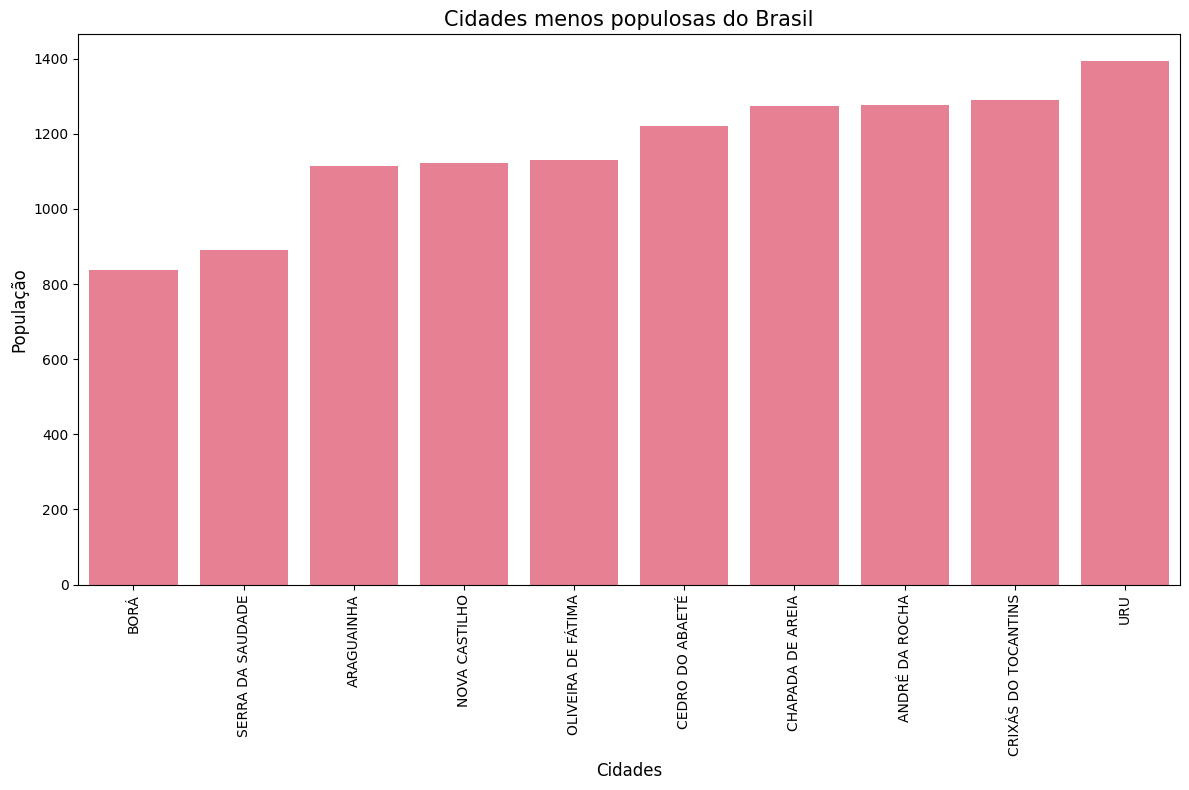

In [22]:
# código para gerar a visualização

import seaborn as sns
import matplotlib.pyplot as plt

df_colunas_cidade_populacao = brasil_df[['cidade', 'populacao']]

df_populosa_ordenado = df_colunas_cidade_populacao.sort_values(by='populacao', ascending=True)

df_populosa_m_10 = df_populosa_ordenado.iloc[:10]

# Definindo a paleta de cores
sns.set_palette('husl')

# Criando um gráfico de barras
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura conforme necessário
sns.barplot(x='cidade', y='populacao', data=df_populosa_m_10)

# Rotacionando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=90)

# Adicionando título e rótulos aos eixos
plt.title('Cidades menos populosas do Brasil', fontsize=15)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('População', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta a posição dos rótulos
plt.show()




 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

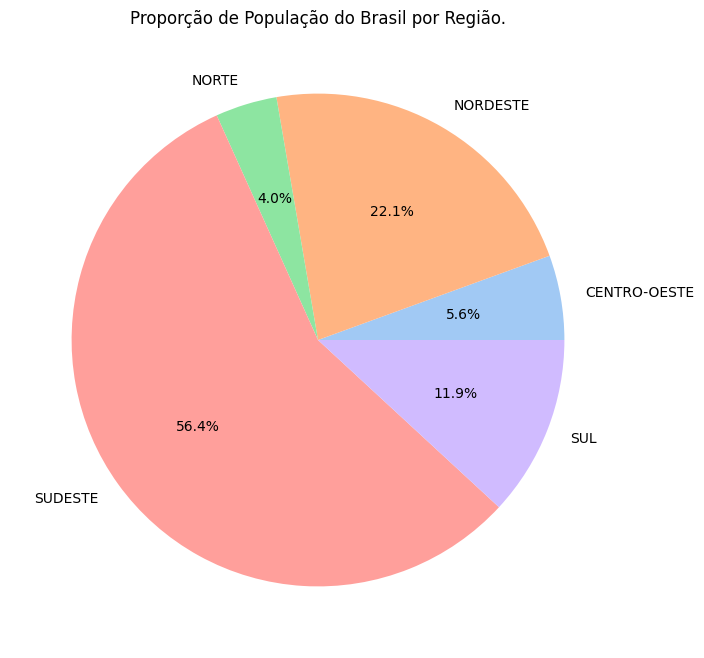

In [30]:
# código para gerar a visualização
import seaborn as sns 
import matplotlib.pyplot as plt

soma_populacao_regiao = brasil_df.groupby('regiao')['populacao'].sum()

porcentagem_regiao = (soma_populacao_regiao / brasil_df_populacao) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(porcentagem_regiao, labels=porcentagem_regiao.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(porcentagem_regiao)))

plt.title('Proporção de População do Brasil por Região.')

plt.show()
